#### Lib Import

In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import urllib
import functions as f
import algorythm as alg
import math

In [11]:
url = "https://pastebin.com/raw/j30qh61S"
#resp = urllib.request.urlopen(url_data)
data1 = pd.read_csv(r'./dataset/Sochi10-11.csv', header=0, sep =',')


data1 = data1.loc[data1['temperatureAvg'] > 1]
data1 = data1.loc[data1['id']  > 933]
#data1 = data1.loc[data1['temperatureAvg'] < 4000]
data1 = data1.loc[data1['temperatureAvg'] > 2000]
#data1 = data1.loc[data1['mappingError'] < 0.01]
#data1 = data1.loc[data1['temperatureSdv'] < 500]
data1 = data1.loc[data1['ts'] < 1644576965032]

In [12]:
data1

,id,distance,ts,x,y,w,h,ts_ir,x_ir,y_ir,w_ir,h_ir,temperatureAvg,temperatureSdv,temperatureMin,temperatureMax,temperatureAvgExt,temperatureSdvExt,mappingError,markup
195,936,175.0000,1644576702539,0.464583,0.481482,0.066667,0.159259,1644576702396,0.408854,0.569444,0.132812,0.239583,3186.502,266.8693,2513,3512,1633.849,285.6791,0.116472,-1
196,936,174.9999,1644576702719,0.466667,0.485185,0.066667,0.162963,1644576702596,0.408854,0.569444,0.135417,0.243056,3182.780,272.9597,2305,3506,1656.872,305.3466,0.116472,-1
197,936,175.0000,1644576702916,0.468750,0.485185,0.066667,0.159259,1644576702796,0.414062,0.572917,0.135417,0.243056,3209.925,241.9787,2541,3506,1652.855,325.7489,0.116472,-1
198,936,169.6969,1644576703170,0.468750,0.477778,0.068750,0.159259,1644576702997,0.416667,0.569444,0.138021,0.239583,3219.396,229.8173,2570,3505,1629.073,332.5831,0.116472,-1
199,936,174.9999,1644576703363,0.470833,0.481482,0.066667,0.155556,1644576703196,0.416667,0.562500,0.138021,0.243056,3219.594,229.5446,2583,3506,1649.054,324.6985,0.116472,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,970,180.6451,1644576964176,0.591667,0.548148,0.064583,0.151852,1644576964001,0.658854,0.666667,0.132812,0.229167,2980.805,319.8466,2249,3349,1770.485,273.5694,0.002670,-1
1177,970,169.6969,1644576964354,0.566667,0.544444,0.068750,0.140741,1644576964201,0.653646,0.666667,0.130208,0.225694,2271.635,576.5858,1484,3340,1691.752,200.8986,0.002670,-1
1178,970,180.6451,1644576964558,0.566667,0.540741,0.064583,0.144445,1644576964401,0.609375,0.659722,0.138021,0.211806,3147.917,276.0424,2253,3429,1620.015,241.0193,0.092545,-1
1179,970,169.6969,1644576964665,0.568750,0.537037,0.068750,0.144445,1644576964601,0.611979,0.652778,0.132812,0.218750,3117.711,354.2634,1540,3418,1625.974,283.9500,0.092545,-1


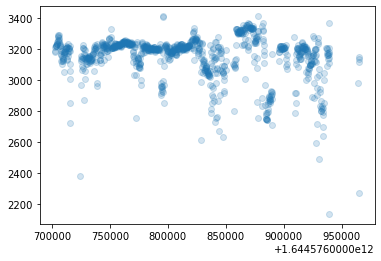

In [13]:
plt.scatter(data1['ts'], data1['temperatureAvg'], alpha=0.2)

In [14]:
main_mean_list = f.mean_list(data1)

In [15]:
algo_set_avg = alg.create_trend(main_mean_list, close_data_size = 10, ratio = 0)
algo_set_avg

array([3179.06741429, 3146.12683459, 3151.02922306, 3161.21734912,
       3171.98528982, 3180.82610659, 3179.98356295, 3179.76194883,
       3186.53521767, 3173.81710983, 3163.79330477, 3150.78285928,
       3147.34429261, 3138.49961988, 3143.10433262, 3152.26053122,
       3159.72711876, 3160.79788709, 3121.80774419, 3135.75032312,
       3148.40451403, 3163.3756007 , 3166.49630266, 3168.56943902,
       3151.97422102, 3106.71607004, 3067.22472382, 3031.02790049,
       3057.54764184, 3030.79214899])

In [16]:
mean_set_avg = alg.create_sdv_trend(main_mean_list, algo_set_avg, close_data_size= 10, ratio=0)

In [17]:
mean_set_avg
border = algo_set_avg + 2/3*mean_set_avg


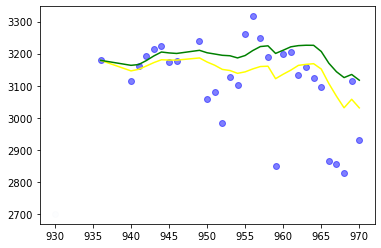

In [18]:
plt.scatter(data1['id'].unique(),main_mean_list, color = 'blue', alpha=0.5)
plt.scatter(930,2700, alpha = 0.01)
plt.plot(data1['id'].unique(), algo_set_avg, color = 'yellow')
plt.plot(data1['id'].unique(), border, color = 'green')
plt.show()